### Importación de datos



In [55]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


ANTES DE IR AR GRANO

In [56]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter #formato a los valores del eje en un gráfico
import numpy as np #cálculos numéricos, arreglos, operaciones matemáticas, etc.
import folium #crear mapas interactivos

#1. Análisis de facturación



In [57]:
# Crear copia para el análisis

ventas_tienda1 = tienda[:]
ventas_tienda1['Fecha de Compra'] = pd.to_datetime(ventas_tienda1['Fecha de Compra'], format="%d/%m/%Y")
ventas_tienda1['Establecimiento'] = 'Tienda 1'

ventas_tienda2 = tienda2[:]
ventas_tienda2['Fecha de Compra'] = pd.to_datetime(ventas_tienda2['Fecha de Compra'], format="%d/%m/%Y")
ventas_tienda2['Establecimiento'] = 'Tienda 2'

ventas_tienda3 = tienda3[:]
ventas_tienda3['Fecha de Compra'] = pd.to_datetime(ventas_tienda3['Fecha de Compra'], format="%d/%m/%Y")
ventas_tienda3['Establecimiento'] = 'Tienda 3'

ventas_tienda4 = tienda4[:]
ventas_tienda4['Fecha de Compra'] = pd.to_datetime(ventas_tienda4['Fecha de Compra'], format="%d/%m/%Y")
ventas_tienda4['Establecimiento'] = 'Tienda 4'

In [58]:
# Crear DataFrame con los datos de todas las tiendas para el análisis de facturación

facturacion1 = ventas_tienda1[['Establecimiento', 'Precio']]
facturacion2 = ventas_tienda2[['Establecimiento', 'Precio']]
facturacion3 = ventas_tienda3[['Establecimiento', 'Precio']]
facturacion4 = ventas_tienda4[['Establecimiento', 'Precio']]

df_facturacion_total = pd.concat([facturacion1, facturacion2, facturacion3, facturacion4])

# Agrupar por tienda y sumar la facturación
facturacion_por_tienda = df_facturacion_total.groupby('Establecimiento')['Precio'].sum().reset_index()

# Mostrar resultado
facturacion_por_tienda


,Establecimiento,Precio
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


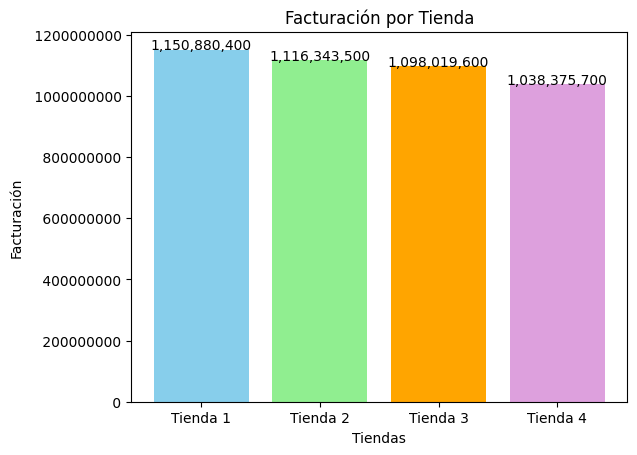

In [59]:
# Gráfico comparativo de facturación por tienda

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# Datos
establecimientos = facturacion_por_tienda['Establecimiento']
ventas = facturacion_por_tienda['Precio']

# Colores (si no los tienes ya definidos)
color = ['skyblue', 'lightgreen', 'orange', 'plum']

# Crear gráfico de barras
fig, ax = plt.subplots()
ax.bar(establecimientos, ventas, color=color)
ax.yaxis.set_major_formatter(FormatStrFormatter('% 1.0f'))

# Etiquetas y título
plt.title('Facturación por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Facturación')

# Mostrar valores encima de cada barra
for i, value in enumerate(ventas):
    ax.text(i, value + 5, str("{:,.0f}").format(value), ha='center')

plt.show()


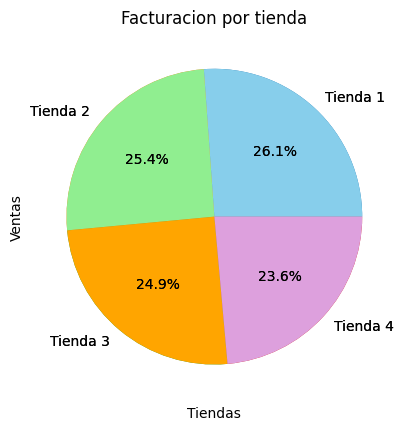

Por los graficos vistos, la tienda 4 tiene la mejor facturación


In [60]:
import matplotlib.pyplot as plt

# Título y etiquetas
plt.title('Facturacion por tienda')
plt.xlabel('Tiendas')
plt.ylabel('Ventas')

# Gráfico circular (pie chart) con porcentajes
plt.pie(ventas, labels=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], autopct='%1.1f%%')
color = ['skyblue', 'lightgreen', 'orange', 'plum']
plt.pie(ventas, labels=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], autopct='%1.1f%%', colors=color)

# Mostrar gráfico
plt.show()
print(f'Por los graficos vistos, la tienda 4 tiene la mejor facturación')

# 2. Ventas por categoría

In [61]:
ventas1=tienda['Categoría del Producto'].value_counts()
ventas2=tienda2['Categoría del Producto'].value_counts()
ventas3=tienda3['Categoría del Producto'].value_counts()
ventas4=tienda4['Categoría del Producto'].value_counts()

consolidado = pd.concat([ventas1, ventas2, ventas3, ventas4], axis=1)
consolidado.columns = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
consolidado

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Muebles,465,442,499,480
Electrónicos,448,422,451,451
Juguetes,324,313,315,338
Electrodomésticos,312,305,278,254
Deportes y diversión,284,275,277,277
Instrumentos musicales,182,224,177,170
Libros,173,197,185,187
Artículos para el hogar,171,181,177,201


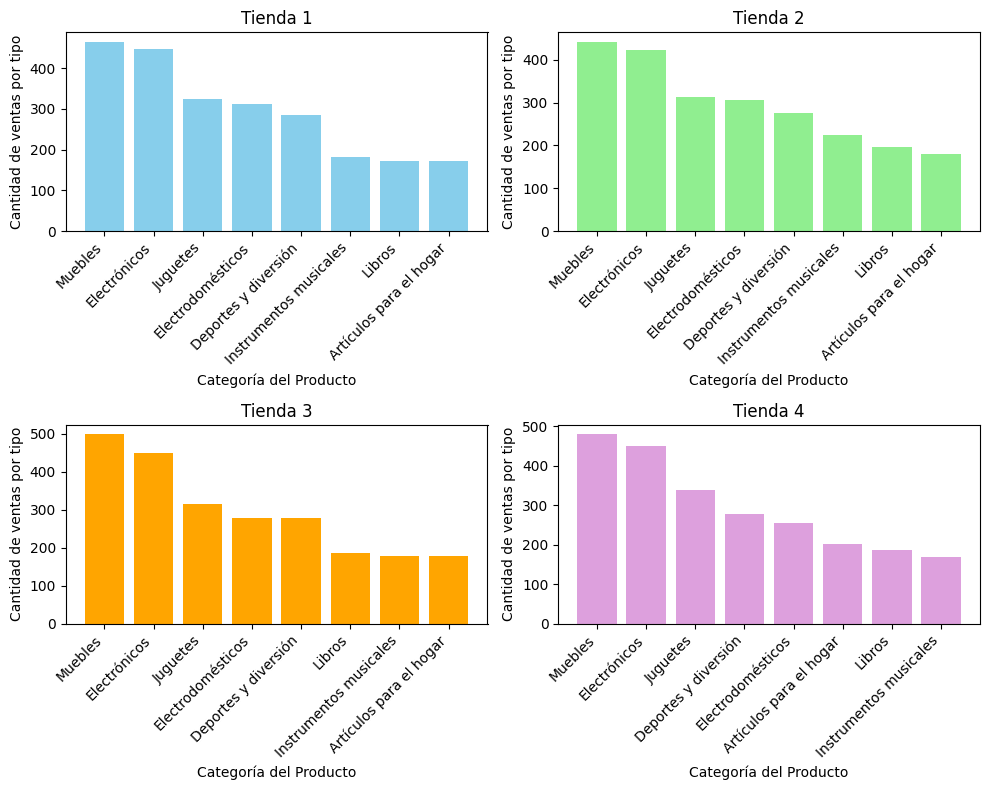

In [62]:
color = ['skyblue', 'lightgreen', 'orange', 'plum']

data = [tienda['Categoría del Producto'], tienda2['Categoría del Producto'],
        tienda3['Categoría del Producto'], tienda4['Categoría del Producto']]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, ax in enumerate(axs.flatten()):
    # Calcula la frecuencia de cada categoría y ordénala
    category_counts = data[i].value_counts().sort_values(ascending=False)

    # Obtén las categorías y sus frecuencias ordenadas
    categories = category_counts.index
    frequencies = category_counts.values

    # Crea el gráfico de barras con color personalizado por tienda
    ax.bar(categories, frequencies, color=color[i])

    ax.set_title(f'Tienda {i+1}')
    ax.set_xlabel('Categoría del Producto')
    ax.set_ylabel('Cantidad de ventas por tipo')
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [64]:
# Verificar columnas en cada DataFrame
print(ventas_tienda1.columns)
print(ventas_tienda2.columns)
print(ventas_tienda3.columns)
print(ventas_tienda4.columns)

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon',
       'Establecimiento'],
      dtype='object')
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon',
       'Establecimiento'],
      dtype='object')
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon',
       'Establecimiento'],
      dtype='object')
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon',
       'Establecimiento']

In [79]:
promedio1 = ventas_tienda1[['Establecimiento', 'Calificación']]
promedio2 = ventas_tienda2[['Establecimiento', 'Calificación']]
promedio3 = ventas_tienda3[['Establecimiento', 'Calificación']]
promedio4 = ventas_tienda4[['Establecimiento', 'Calificación']]

# Concatenar todos los DataFrames
promedios = pd.concat([promedio1, promedio2, promedio3, promedio4])

# Agrupar por 'Establecimiento' y calcular la media de las valoraciones
df_calificacion = promedios.groupby(['Establecimiento'])['Calificación'].mean().reset_index()

df_calificacion

,Establecimiento,Calificación
0,Tienda 1,3.976685
1,Tienda 2,4.037304
2,Tienda 3,4.048326
3,Tienda 4,3.995759


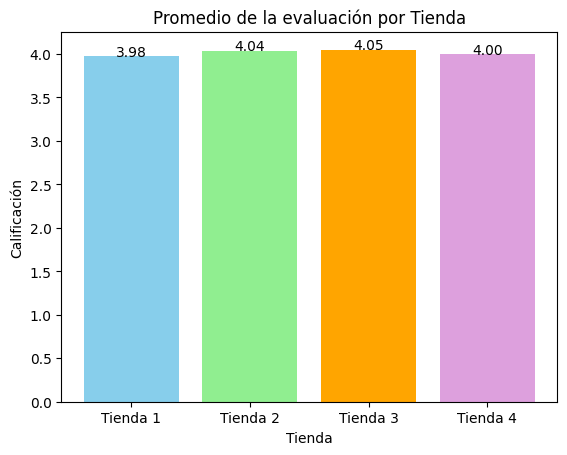

In [81]:
# Reemplazamos y traducimos el código
establecimiento = df_calificacion['Establecimiento']  # Reemplazado 'df_avaliacao' por 'df_calificacion'
evaluacion = df_calificacion['Calificación']  # Reemplazado 'Avaliação da compra' por 'Evaluación de la compra'

# Crear gráfico de barras
fig, ax = plt.subplots()
ax.bar(establecimiento, evaluacion, color=color)  # Usamos 'color' para las barras

# Etiquetas y título
ax.set_xlabel('Tienda')
ax.set_ylabel('Calificación')
ax.set_title('Promedio de la evaluación por Tienda')

# Mostrar valores encima de cada barra
for i, value in enumerate(df_calificacion['Calificación']):
    ax.text(i, value, str("{:.2f}").format(value), ha='center')

# Mostrar el gráfico
plt.show()


# 4. Productos más y menos vendidos

In [82]:
def mayor_y_menor(tienda):
  productos = {}
  for i in range(len(tienda)):
    producto = tienda.loc[i, "Producto"]

    if producto in productos:
      productos[producto] += 1
    else:
      productos[producto] = 1
  productos_ordenados = dict(sorted(productos.items(), key=lambda item: item[1], reverse=True))
  mas_vendido = next(iter(productos_ordenados.items()))
  menos_vendido = next(reversed(productos_ordenados.items()))
  return mas_vendido, menos_vendido, productos_ordenados


In [83]:
def mostrar_mas_y_menos_vendido(tienda,nombre):
    mas_vendido, menos_vendido, productos_ordenados = mayor_y_menor(tienda)

    productos = [mas_vendido[0], menos_vendido[0]]
    cantidades = [mas_vendido[1], menos_vendido[1]]

    colores = ['#4CAF50', '#F44336']

    plt.figure(figsize=(8, 4))
    bars = plt.barh(productos, cantidades, color=colores)

    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
                 f'{int(width)} ventas', va='center')

    plt.xlim(0, max(cantidades) + 10)
    plt.xlabel("Cantidad de Ventas")
    plt.title(f"Producto Menos Vendido vs. Más Vendido en {nombre}")
    plt.tight_layout()
    plt.show()


In [84]:
def mostrar_productos_ordenados(tienda, nombre):
    _, _, productos_ordenados = mayor_y_menor(tienda)

    productos = list(productos_ordenados.keys())
    cantidades = list(productos_ordenados.values())

    plt.figure(figsize=(10, 6))
    colores = mpl.colormaps['Set3']
    colors = [colores(i) for i in range(len(nombres))]
    bars = plt.barh(productos, cantidades, color=colors)

    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.1, bar.get_y() + bar.get_height() / 2,
                 f'{int(width)}', va='center')

    plt.xlabel("Cantidad de Ventas")
    plt.title(f"Productos Ordenados por Ventas en {nombre}")
    plt.tight_layout()
    plt.show()

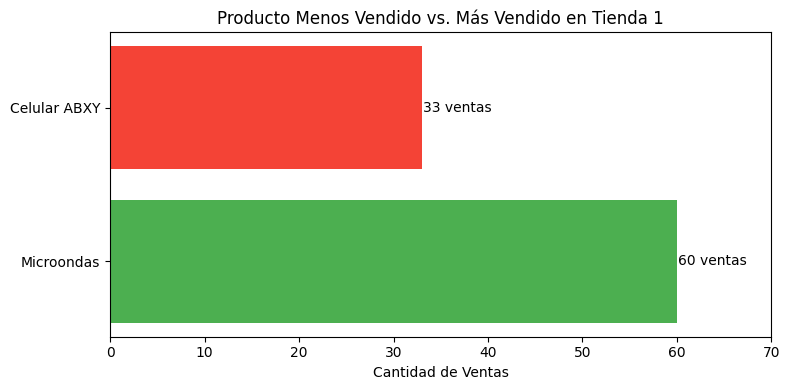

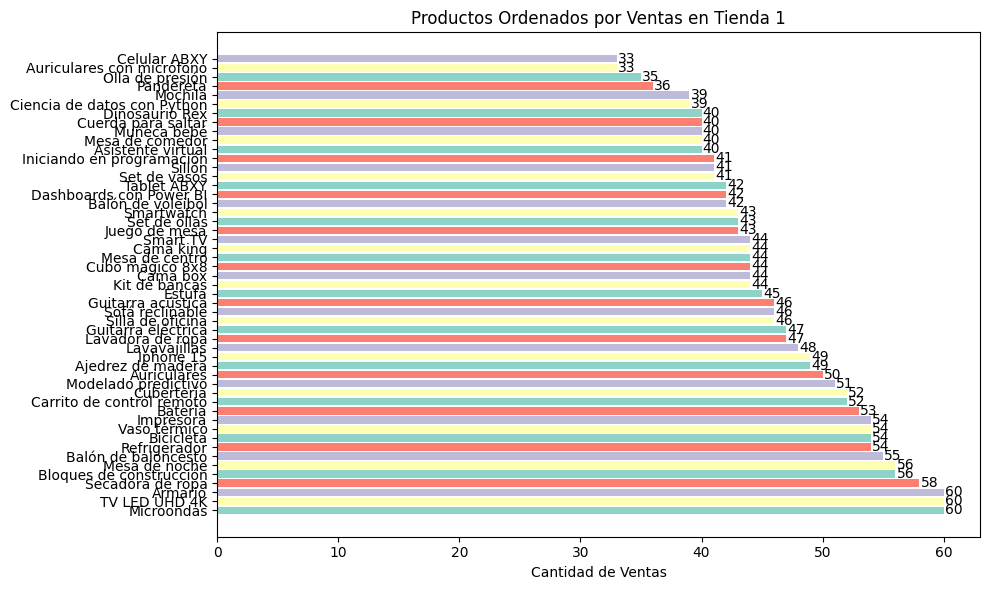

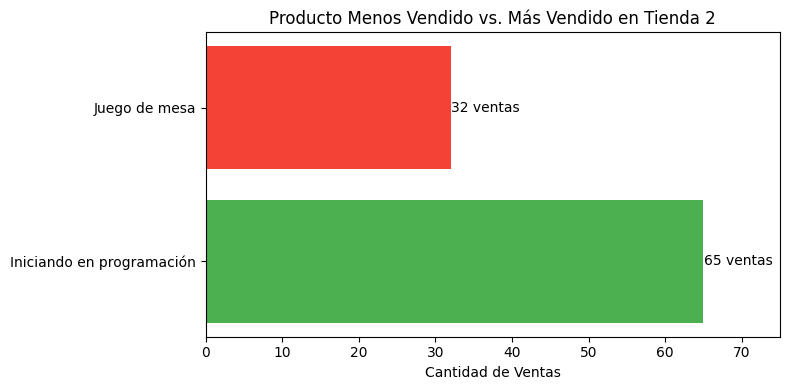

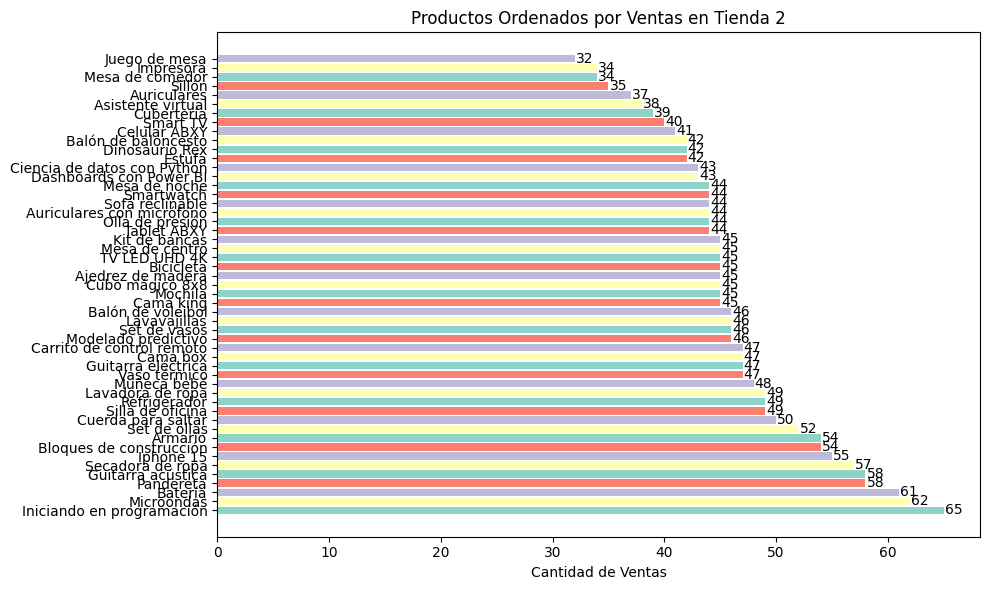

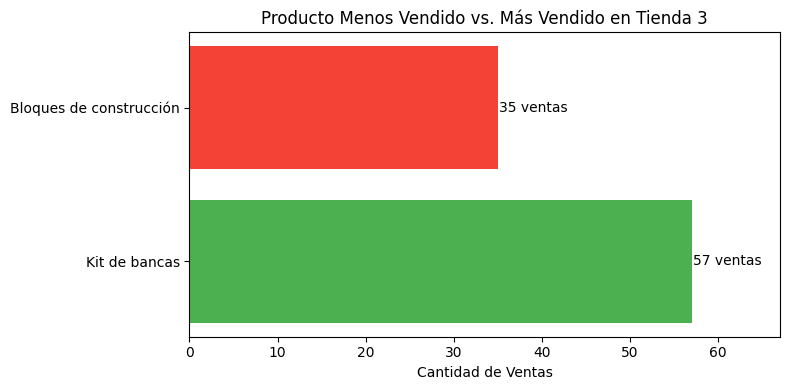

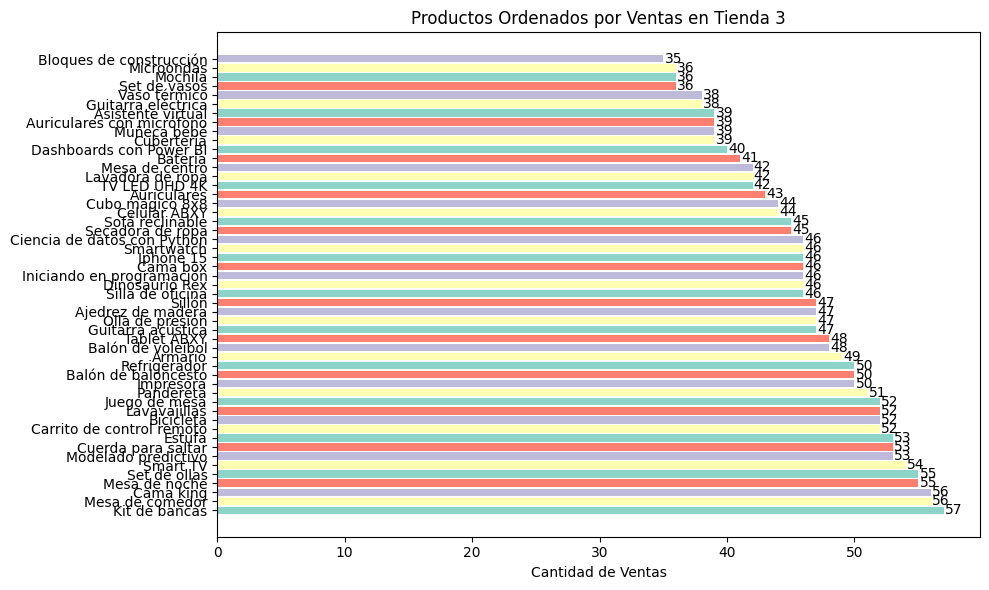

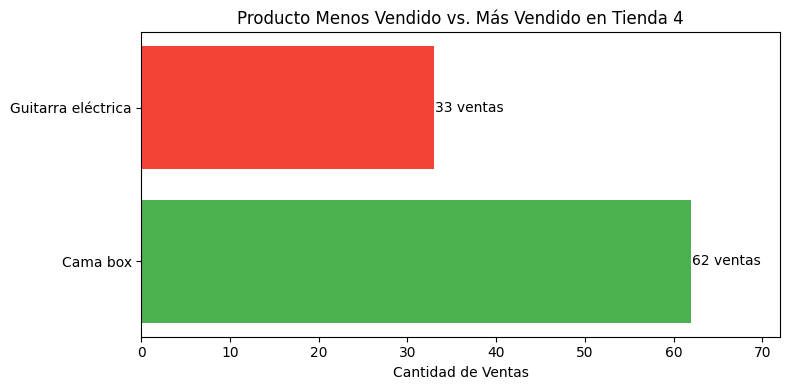

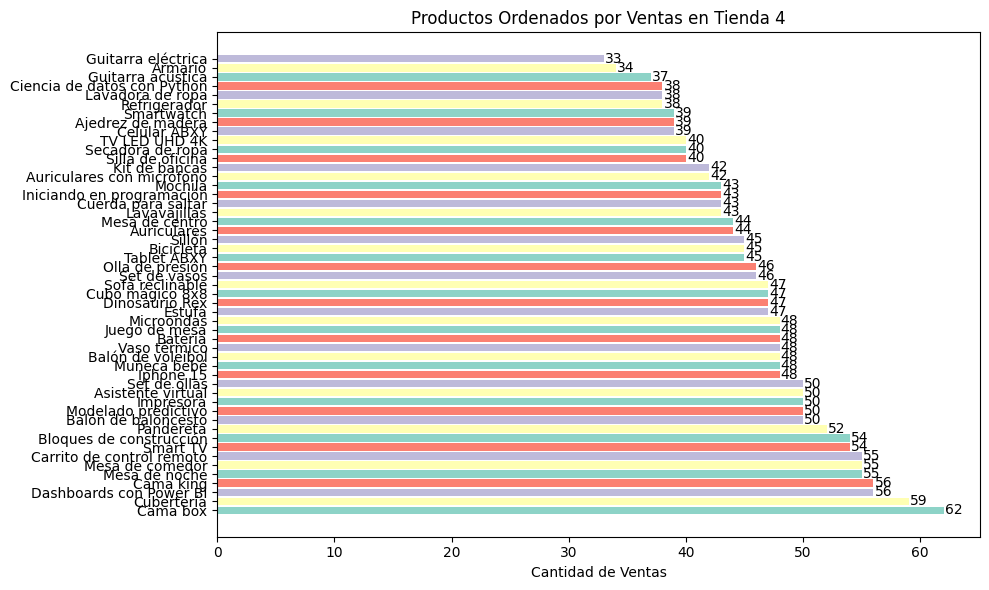

In [85]:
for tienda, nombre in zip(tiendas,nombres):
  mostrar_mas_y_menos_vendido(tienda,nombre)
  mostrar_productos_ordenados(tienda,nombre)

# 5. Envío promedio por tienda

In [86]:
def promedio_envio(tienda):
  promedio = round(tienda['Costo de envío'].sum()/len(tienda))
  return float(promedio)

lista_promedios = [promedio_envio(tienda) for tienda in tiendas]

In [87]:
def graficos_promedio_envio(promedios):
    plt.figure(figsize=(8, 5))
    colores = mpl.colormaps['Set3']
    colors = [colores(i) for i in range(len(promedios))]

    bars = plt.bar(nombres, promedios, color=colors)

    plt.xlabel("Tiendas")
    plt.ylabel("Costo Promedio de Envío")
    plt.title("Promedios de Envíos por Tienda")
    plt.xticks(rotation=45)

    max_val = max(promedios)
    plt.ylim(top=max_val + 2000)

    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 500,
            f'${int(height)}',
            ha='center', va='bottom', fontsize=10
        )

    plt.tight_layout()
    plt.show()


In [88]:
def graficos_promedio_envio_pie(promedios):
    plt.figure(figsize=(3, 3))
    colores = mpl.colormaps['Set3']
    colors = [colores(i) for i in range(len(promedios))]
    plt.pie(promedios, labels=nombres, autopct='%1.1f%%', startangle=90, colors=colors)
    plt.title("Promedios de Envíos por Tienda")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

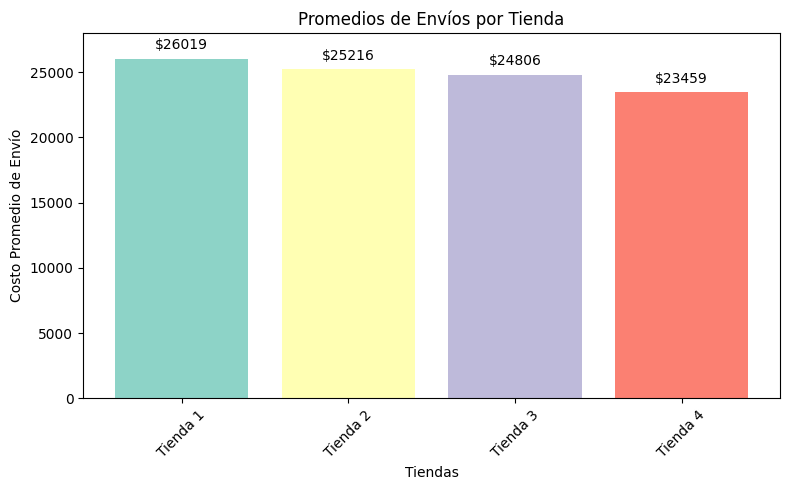

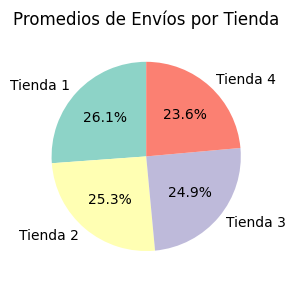

In [89]:
graficos_promedio_envio(lista_promedios)
graficos_promedio_envio_pie(lista_promedios)

## **6.** **CONCLUSIONES**
Después de revisar los principales indicadores de rendimiento de las cuatro tiendas, como:

💰 Facturación

📊 Volumen de ventas por categoría

⭐ Calificación promedio

📦 Productos más y menos vendidos

🚚 Costo promedio de envío

se observa que la Tienda 4 tiene un desempeño notablemente inferior en casi todos los aspectos analizados. Es la que menos ingresos genera 💸, la que registra menor cantidad de ventas 📉 y muestra una baja rotación de productos 💤.

Si bien la Tienda 1 tiene el costo de envío más elevado 🛫, este aspecto queda compensado por su alto nivel de ventas y facturación 📈.

Por eso, considerando el panorama general, la Tienda 4 aparece como la menos rentable ❌, y sería razonable pensar en cerrarla o venderla 🏷️.